# **Análise Exploratória: Preços dos Combustíveis no Brasil (Maio-Junho/2023)**

---

 Este projeto tem como objetivo realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. Para esta análise ultilizaremos os dados fornecidos pela Agência Nacional de Petróleo e Gás
Natural e Biocombustíveis(ANP). A seguir veremos os objetivos do projeto, o que será estudado e quais as análises necessárias para responder as questões apresentadas e quais problemas podemos resolver com esses insights. Os dados que iremos analisar são de **Etanol Hidratado + Gasolina C** do mês de **Maio** e **Junho** de 2023.



##### **1.1. Sobre a ANP**

A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil; realiza e divulga pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos; promove estudos sobre o potencial petrolífero e o desenvolvimento do setor; entre outras atividades.

<center><img alt="Logo anp" width="30%" src="./img/anp.jpg"></center>

##### **1.2. Quais os problemas a serem resolvidos?**

Esta análise tem como objetivo responder as seguintes perguntas:

1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

---


## **2. Coleta e análise inicial dos dados** 

Primeiramente, para podermos iniciar nossos trabalhos, iremos coletar nossos dados e ter nosso primeiro contato com eles, compreendendo suas características que o definem e sua estrutura.


##### **2.1. Importação das bibliotecas que serão utilizadas**

In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


##### **2.2. Coleta dos dados necessários para análise**

Agora iremos coletar os dados que serão ultilizados através dos arquivos .csv que estão disponíveis no site do [**gov.br**](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis). Serão ultilizados os dados referente ao mês de **Maio** e **Junho** de **Etanol Hidratado + Gasolina C**. Iremos juntar os dois meses para formar um único DataSet, para assim conseguir análisar os dados de forma mais ampla e eficaz.

In [40]:
# Importando os dados de Maio
combustiveis_maio = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv", sep=(";"))
# Importando os dados de Junho
combustiveis_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv", sep=(";"))

# Concatenando os dados
combustiveis = pd.concat([combustiveis_maio, combustiveis_junho,], ignore_index=True)


##### **2.3. Conhecendo o Dados**

Abaixo teremos o primeiro contato com o DataSet, mostrando as 5 primeiras e 5 últimas linhas, onde podemos observar de maneira geral como é o DataSet coletado.

In [41]:
#Verificar dimensão do DataSet
combustiveis.shape

(107531, 16)

Com essa checagem, podemos verificar que nosso DataSet contém **107531 linhas/registros** por **16 colunas/variáveis**.

##### **2.3.2. Checando valores nulos (NaN)**

In [4]:
dados_nulos_qntd = combustiveis.isnull().sum()
dados_nulos_porc = ((combustiveis.isnull().sum() / combustiveis.shape[0]) * 100).round(1)
dados_nulos = pd.DataFrame({
    'Frequência': dados_nulos_qntd,
    'Porcentagem (%)': dados_nulos_porc
})
dados_nulos.rename_axis('Coluna/Váriavel', axis='columns', inplace=True)
dados_nulos


Coluna/Váriavel,Frequência,Porcentagem (%)
Regiao - Sigla,0,0.0
Estado - Sigla,0,0.0
Municipio,0,0.0
Revenda,0,0.0
CNPJ da Revenda,0,0.0
Nome da Rua,0,0.0
Numero Rua,45,0.0
Complemento,83683,77.8
Bairro,226,0.2
Cep,0,0.0


Verificando os valores nulos podemos perceber que a coluna **"Valor de Compra" tem 100% de valores nulos**, e a coluna **"Complemento" com mais de 77% de valores ausentes**. Com esse número elevado de valores nulos, essas colunas não serão úteis para nossa análise, com isso, podemos retirar elas do nosso DataSet, faremos isso logo mais abaixo.

##### **2.3.3. Dicionário de Colunas/Variáveis**

In [5]:
#Verificando combustiveis
combustiveis.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

Ao verificar as colunas do DataSet, podemos fazer um dicionário para dar um significado mais amplo para elas e então saberemos exatamente o que é cada váriavel.

- `Regiao - Sigla` - Sigla da Região.
- `Estado - Sigla` - Sigla da Unidade Federativa (UF).
- `Municipio` - Nome do município.
- `Revenda` - Nome do estabelecimento.
- `CNPJ da Revenda` - Número do Cadastro Nacional de Pessoa Jurídica.
- `Nome da Rua` - Nome do logradouro.
- `Numero da Rua` - Número do logradouro.
- `Complemento` - Complemento do logradouro.
- `Bairro` - Nome do bairro.
- `Cep` - Número do Código do Endereço Postal (CEP) do logradouro.
- `Produto` - Nome do combustível pesquisado.
- `Data da Coleta` - Data da coleta do(s) preço(s).
- `Valor de Venda` - Preço de venda ao consumidor final praticado pelo revendedor, na data da coleta.
- `Valor de Compra` - Preço de distribuição (preço de venda da distribuidora para o posto revendedor de combustível)**.
- `Unidade de Medida` - Unidade de Medida.
- `Bandeira` - Nome da Bandeira da revenda.

##### **2.3.4. Verificando os tipos de dados**

In [6]:
#Verificar tipos de dados
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107531 entries, 0 to 107530
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     107531 non-null  object 
 1   Estado - Sigla     107531 non-null  object 
 2   Municipio          107531 non-null  object 
 3   Revenda            107531 non-null  object 
 4   CNPJ da Revenda    107531 non-null  object 
 5   Nome da Rua        107531 non-null  object 
 6   Numero Rua         107486 non-null  object 
 7   Complemento        23848 non-null   object 
 8   Bairro             107305 non-null  object 
 9   Cep                107531 non-null  object 
 10  Produto            107531 non-null  object 
 11  Data da Coleta     107531 non-null  object 
 12  Valor de Venda     107531 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  107531 non-null  object 
 15  Bandeira           107531 non-null  object 
dtypes:

Verificando os tipos de dados que nosso DataSet tem, podemos perceber que há alguns problemas: A váriavel **"Valor de Venda"** e **"Data Coleta"** está como do tipo "Object". Isso dificultaria uma análise em cima desses dados pois não estão do tipo de dado correto. Faremos essa correção logo abaixo.

##### **2.3.5 Verificando valores únicos**

In [7]:
#Verificar valores unicos
combustiveis.nunique()

Regiao - Sigla          5
Estado - Sigla         27
Municipio             459
Revenda              6652
CNPJ da Revenda      7481
Nome da Rua          5095
Numero Rua           3001
Complemento          1323
Bairro               3634
Cep                  5750
Produto                 3
Data da Coleta         45
Valor de Venda        387
Valor de Compra         0
Unidade de Medida       1
Bandeira               45
dtype: int64

Apenas verificando os valores únicos do nosso DataSet, podemos tirar algumas informações importantes. Existem **7481 CNPJ cadastrados**, com isso percebemos que uma empresa pode ter um ou mais postos cadastrados nesse banco de dados, além de **45 Bandeiras diferentes** de distribuidor.

---

## 💡**Curiosidades do DataSet**

Com esse conhecimento inicial que tivemos do nosso DataSet podemos obter alguma insights importantes sobre ele.

- **Qual bandeira tem mais postos de combustível?**

In [46]:
# Criando dataframe com as bandeiras mais frequentes
bandeira_qntd = combustiveis['Bandeira'].value_counts()
bandeira_porc = round(combustiveis['Bandeira'].value_counts(normalize=True) * 100, 1)
bandeira = pd.DataFrame({
    'Frequência': bandeira_qntd,
    'Porcentagem (%)': bandeira_porc
})
bandeira.head(5)

,Frequência,Porcentagem (%)
BRANCA,35939,33.4
IPIRANGA,23480,21.8
VIBRA ENERGIA,23089,21.5
RAIZEN,15779,14.7
ALESAT,4005,3.7


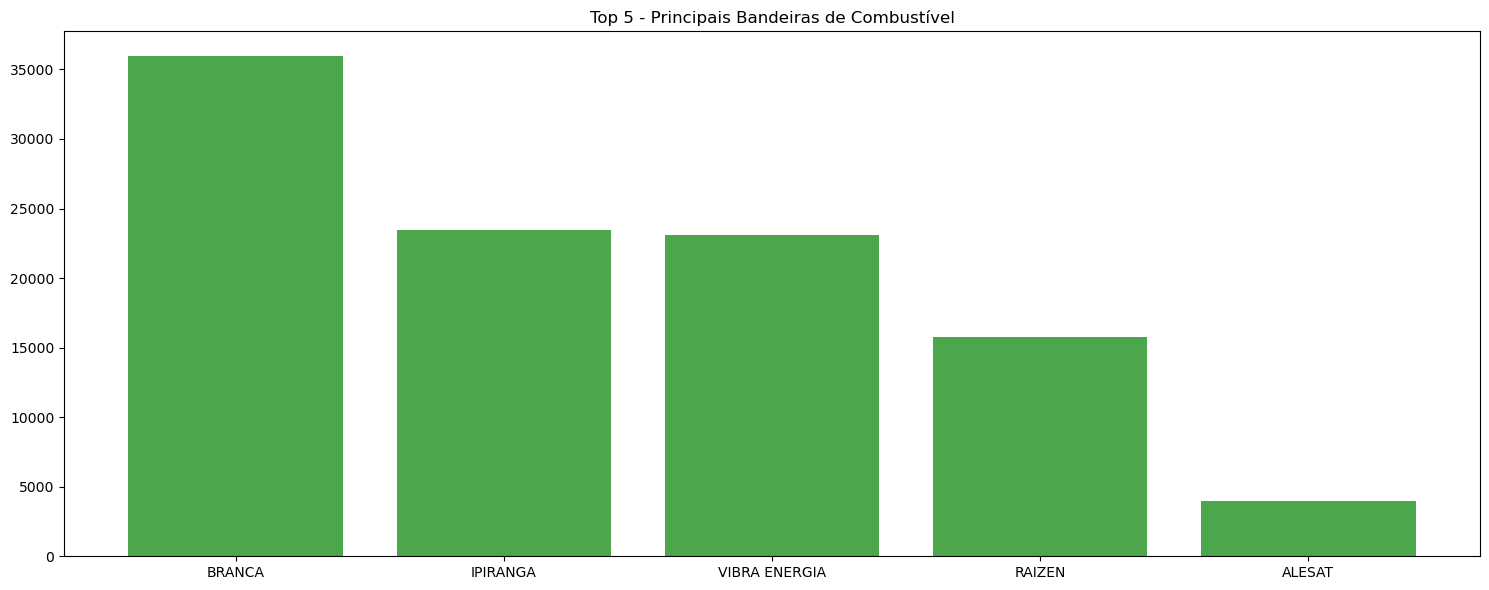

In [47]:
#Criando gráfico
top_bandeiras = bandeira.head(5)
plt.figure(figsize=(15, 6)) 
plt.bar(top_bandeiras.index, top_bandeiras['Frequência'], color='green', alpha=0.7)
plt.title('Top 5 - Principais Bandeiras de Combustível')
plt.tight_layout()
plt.show()

Como podemos observar na tabela e também visulamente no gráfico acima, as chamadas **"Bandeiras Brancas"** que são os postos que não faz nenhuma parceria com uma grande distribuidora, ou seja, os que possui marca própria são a maioria no Brasil com mais de 35 mil postos, sendo 33,4% de todas as bandeiras desse DataSet. Em segundo lugar temos a bandeira Ipiranga com mais de 21 mil postos.

- **Qual estado do Brasil tem mais postos de combustíveis?**


In [57]:
estado_qtnd_postos = combustiveis['Estado - Sigla'].value_counts()
estado_porc_postos = round(combustiveis['Estado - Sigla'].value_counts(normalize=True) * 100, 1)
postos_estado = pd.DataFrame({
    'Frequência': estado_qtnd_postos,
    'Porcentagem (%)': estado_porc_postos
})
postos_estado.head()

,Frequência,Porcentagem (%)
SP,31103,28.9
MG,11605,10.8
RJ,8423,7.8
RS,7074,6.6
PR,7014,6.5


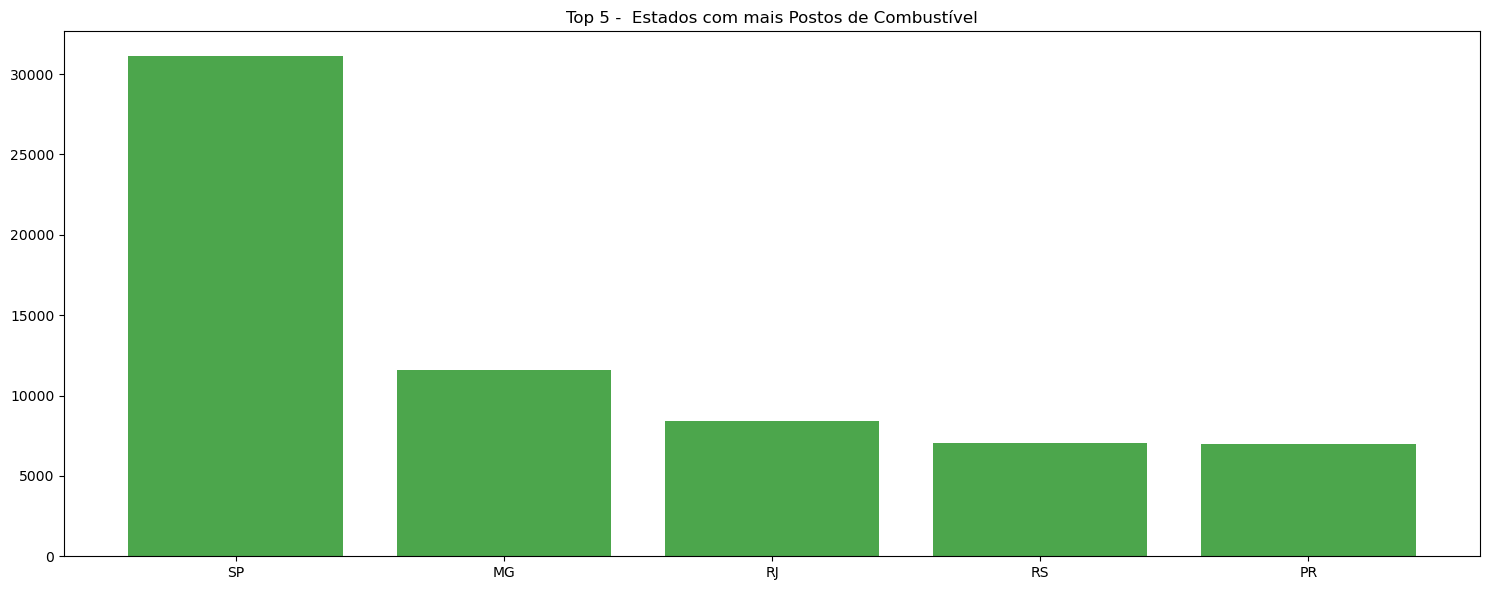

In [59]:
top_postos = postos_estado.head(5)
plt.figure(figsize=(15, 6)) 
plt.bar(top_postos.index, top_postos['Frequência'], color='green', alpha=0.7)
plt.title('Top 5 -  Estados com mais Postos de Combustível')
plt.tight_layout()
plt.show()

Com mais de **30 mil postos de combutíveis o estado de São Paulo é o que mais tem postos de gasolina**, isso representa 28,9% de todos os postos do Brasil. Em seguida vem **Minas Gerais e Rio de Janeiro com 10,8% e 7,8% respectivamente**. São Paulo também é lider quando se trata no total de automóveis circulando, possui uma frota com mais de 9 Milhões de automóveis, o que de fato reflete no gráfico acima.

---

## **<font color ='gold' size=5>3. Tratamento do Dados</font>**

###  **<font color ='white' size=5>3.1. Vamos verificar a porcentagem de dados ausentes em cada coluna.</font>**

In [10]:

(((combustiveis.isnull().sum() / combustiveis.shape[0]) * 100).sort_values(ascending=False)).round(2)

Valor de Compra      100.00
Complemento           77.82
Bairro                 0.21
Numero Rua             0.04
Regiao - Sigla         0.00
Estado - Sigla         0.00
Municipio              0.00
Revenda                0.00
CNPJ da Revenda        0.00
Nome da Rua            0.00
Cep                    0.00
Produto                0.00
Data da Coleta         0.00
Valor de Venda         0.00
Unidade de Medida      0.00
Bandeira               0.00
dtype: float64

Podemos reparar que duas colunas se sobressaem, sendo elas a coluna de `Valor de Compra` que possui **_100% dos seus valores nulos_**, e a coluna `Complemento` que possui cerca de **_77% de seus valores nulos._**

A partir disso, precisamos abordar certas mudanças em algumas das colunas durante o processo de limpeza do DataSet. Sendo elas:

- Resetar o index do DataFrame concatenado;

- Retirar a coluna `Valor de Compra`, pois a mesma é composta apenas por **_valores NaN;_**
- Alterar o Dtype da coluna `Valor de Venda` de **_str_** para **_float64_**, para podermos realizar operações e análises a partir dela;
- Retirar a coluna `Complemento`, pois não usaremos para nossa análise.
- Alterar o Dtype da coluna `Data da Coleta` de str para DateTime, para podermos realizar filtragens e pesquisas a partir das datas;


Com esse tratamento dos dados, poderemos aprofundar mais nossa análise exploratória e compreender ainda melhor o nosso DataSet.

### **<font color ='white' size=5>3.2. Tratamento dos dados</font>**



- Resetando o Index no DataFrame concatenado:

In [11]:
combustiveis.reset_index(0,drop=True,inplace = True)

- Retirar a coluna valor de compra, pois tem 100% dos valores nulos,preencher a coluna complemento com 0 e mudar o tipo da coluna valor de venda de object para float64

In [12]:
combustiveis.drop('Valor de Compra',axis=1,inplace=True)

- Transformando valores da Coluna 'Valor de Venda' para float64

In [13]:
combustiveis['Valor de Venda'] = combustiveis['Valor de Venda'].str.replace(',', '.').astype(float)

- Removendo a coluna "Complemento"

In [14]:
combustiveis.drop('Complemento', axis=1, inplace=True)

- Alterando o tipo de dado da coluna 'Data da Coleta' para datetime

In [15]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], dayfirst=True)

- Após realizarmos a limpeza e tratamento dos dados vamos conferir como está  nosso dataframe

In [16]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107531 entries, 0 to 107530
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     107531 non-null  object        
 1   Estado - Sigla     107531 non-null  object        
 2   Municipio          107531 non-null  object        
 3   Revenda            107531 non-null  object        
 4   CNPJ da Revenda    107531 non-null  object        
 5   Nome da Rua        107531 non-null  object        
 6   Numero Rua         107486 non-null  object        
 7   Bairro             107305 non-null  object        
 8   Cep                107531 non-null  object        
 9   Produto            107531 non-null  object        
 10  Data da Coleta     107531 non-null  datetime64[ns]
 11  Valor de Venda     107531 non-null  float64       
 12  Unidade de Medida  107531 non-null  object        
 13  Bandeira           107531 non-null  object  

Como podemos ver, nossas mudanças foram realizadas com sucesso, agora temos os tipos de dados corretos para as colunas apropriadas.

Vamos visualizar os 5 registros iniciais do DataFrame:

In [17]:
combustiveis.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,ETANOL,2023-05-01,3.79,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,GASOLINA,2023-05-01,4.69,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,ETANOL,2023-05-01,5.49,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA ADITIVADA,2023-05-01,6.97,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA,2023-05-01,6.97,R$ / litro,IPIRANGA


### **<font color ='white' size=5>3.3 Checando outliers.</font>**

#### <font color ='white' size=5>**3.3.1 Resumo estatístico dos valores com o método describe**</font>

In [18]:
combustiveis['Valor de Venda'].describe().round(3)

count    107531.000
mean          5.030
std           0.764
min           2.970
25%           4.490
50%           5.240
75%           5.590
max           7.990
Name: Valor de Venda, dtype: float64

#### <font color ='white' size=5>**3.3.2 Separando o dataframe principal em dataframes por mês**</font>

In [19]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], format='%d/%m/%Y')


# Filtrar as datas para o mês de maio
maio = combustiveis[combustiveis['Data da Coleta'].dt.month == 5]
# Filtrar as datas para o mês de junho
junho = combustiveis[combustiveis['Data da Coleta'].dt.month == 6]


#### <font color ='white' size=5>**3.3.3 Criando dataframes específicos para cada combustível**</font>

- **Etanol**

In [20]:
etanol = combustiveis[(combustiveis['Produto'] == 'ETANOL') ]

etanol

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,ETANOL,2023-05-01,3.79,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,ETANOL,2023-05-01,5.49,R$ / litro,IPIRANGA
5,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,ETANOL,2023-05-01,4.58,R$ / litro,VIBRA ENERGIA
9,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,ETANOL,2023-05-01,4.29,R$ / litro,IPIRANGA
12,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0002-39,"AVENIDA EMIDIO DE LIMA,",23,JARDIM ESPERANCA,57304-820,ETANOL,2023-05-01,4.69,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107517,CO,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0002-87,AVENIDA JOSE INACIO SOBRINHO,731,SETOR MARABA,74465-524,ETANOL,2023-06-30,3.94,R$ / litro,IPIRANGA
107520,SE,RJ,ITAGUAI,POSTO DE GASOLINA CIDADE DO PORTO LTDA,10.317.382/0001-35,RODOVIA RIO SANTOS,S/N,IBIRAPITANGA,23815-550,ETANOL,2023-06-30,4.39,R$ / litro,RAIZEN
107522,SE,SP,ITAPOLIS,AROEIRA AUTO POSTO EIRELI,24.577.972/0001-01,AVENIDA FREI PAULO LUIG,861,CENTRO,14900-000,ETANOL,2023-06-30,3.59,R$ / litro,BRANCA
107524,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,VILA DE ABRANTES,42840-000,ETANOL,2023-06-30,4.44,R$ / litro,BRANCA


- **Gasolina**

In [21]:
gasolina = combustiveis[(combustiveis['Produto'] == 'GASOLINA') ]
gasolina

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,GASOLINA,2023-05-01,4.69,R$ / litro,BRANCA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA,2023-05-01,6.97,R$ / litro,IPIRANGA
7,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,GASOLINA,2023-05-01,5.89,R$ / litro,VIBRA ENERGIA
8,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,CENTRO,57300-080,GASOLINA,2023-05-01,5.77,R$ / litro,VIBRA ENERGIA
11,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,GASOLINA,2023-05-01,5.74,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107521,SE,RJ,ITAGUAI,POSTO DE GASOLINA CIDADE DO PORTO LTDA,10.317.382/0001-35,RODOVIA RIO SANTOS,S/N,IBIRAPITANGA,23815-550,GASOLINA,2023-06-30,5.59,R$ / litro,RAIZEN
107523,SE,SP,ITAPOLIS,AROEIRA AUTO POSTO EIRELI,24.577.972/0001-01,AVENIDA FREI PAULO LUIG,861,CENTRO,14900-000,GASOLINA,2023-06-30,5.49,R$ / litro,BRANCA
107526,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,VILA DE ABRANTES,42840-000,GASOLINA,2023-06-30,5.64,R$ / litro,BRANCA
107529,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,PARQUE REAL SERRA VERDE,42813-080,GASOLINA,2023-06-30,5.64,R$ / litro,BRANCA


- **Gasolina Aditivada**

In [22]:
gasolina_aditivada = combustiveis[(combustiveis['Produto'] == 'GASOLINA ADITIVADA') ]
gasolina_aditivada

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA ADITIVADA,2023-05-01,6.97,R$ / litro,IPIRANGA
6,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,GASOLINA ADITIVADA,2023-05-01,5.89,R$ / litro,VIBRA ENERGIA
10,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,GASOLINA ADITIVADA,2023-05-01,5.94,R$ / litro,IPIRANGA
13,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0002-39,"AVENIDA EMIDIO DE LIMA,",23,JARDIM ESPERANCA,57304-820,GASOLINA ADITIVADA,2023-05-01,5.94,R$ / litro,IPIRANGA
16,NE,AL,DELMIRO GOUVEIA,AUTO POSTO FREITAS & MAIA LTDA,12.436.978/0001-80,RUA FLORIANO PEIXOTO,247,CENTRO,57480-000,GASOLINA ADITIVADA,2023-05-01,6.69,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107512,NE,CE,ITAPIPOCA,DISTRIBUIDORA DE DERIVADOS DE PETROLEO AMONTAD...,13.783.012/0001-81,RODOVIA CE 354,S/N,DESERTO,62502-974,GASOLINA ADITIVADA,2023-06-30,5.92,R$ / litro,SP
107515,SE,SP,ITAPOLIS,AUTO POSTO E CONVENIENCIA BHX LTDA,04.464.161/0001-97,RUA JOSE ROSSI,685,CENTRO,14900-000,GASOLINA ADITIVADA,2023-06-30,5.39,R$ / litro,BRANCA
107518,CO,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0002-87,AVENIDA JOSE INACIO SOBRINHO,731,SETOR MARABA,74465-524,GASOLINA ADITIVADA,2023-06-30,5.64,R$ / litro,IPIRANGA
107525,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,VILA DE ABRANTES,42840-000,GASOLINA ADITIVADA,2023-06-30,5.64,R$ / litro,BRANCA



### <font color ='white' size=5>**3.4 Calculo do limites de outlier**</font>

#### <font color ='white' size=5>**3.4.1 Definindo um range para os outliers utilizando a Regra 1.5 IQR (Interquartile Range): Valores que estão abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR, onde Q1 é o primeiro quartil e Q3 é o terceiro quartil.**</font>


In [23]:
# Definindo os quartis para o etanol
primeiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['25%']
terceiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['75%']


# Definindo os quartis para a gasolina
primeiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['25%']
terceiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['75%']

# Definindo os quartis para o gasolina aditivada
primeiro_quartil_aditivada = gasolina_aditivada['Valor de Venda'].describe().loc['25%']
terceiro_quartil_aditivada = gasolina_aditivada['Valor de Venda'].describe().loc['75%']

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Primeiro Quartil': [primeiro_quartil_etanol, primeiro_quartil_gasolina, primeiro_quartil_aditivada],
    'Terceiro Quartil': [terceiro_quartil_etanol, terceiro_quartil_gasolina, terceiro_quartil_aditivada]
}

# Criar o DataFrame
df_quartis = pd.DataFrame(dados)

df_quartis


,Combustível,Primeiro Quartil,Terceiro Quartil
0,Etanol,3.74,4.45
1,Gasolina,5.17,5.59
2,Gasolina Aditivada,5.32,5.79


#### <font color ='white' size=5>**3.4.2 Definimos os limites inferiores e superioes de outliers**

In [24]:
#Calculando o IQR e os limites para detecção de outliers

# IQR = Q3 - Q1

#Etanol
IQR_etanol = terceiro_quartil_etanol - primeiro_quartil_etanol


limite_outlier_inferior_etanol = (primeiro_quartil_etanol - (1.5 * IQR_etanol)).round(3)
limite_outlier_superior_etanol = (terceiro_quartil_etanol + (1.5 * IQR_etanol)).round(3)

#Gasolina
IQR_gasolina = terceiro_quartil_gasolina - primeiro_quartil_gasolina

limite_outlier_inferior_gasolina = (primeiro_quartil_gasolina - (1.5 * IQR_gasolina)).round(3)
limite_outlier_superior_gasolina = (terceiro_quartil_gasolina + (1.5 * IQR_gasolina)).round(3)

#Gasolina Aditivada
IQR_gasolina_aditivada = terceiro_quartil_aditivada - primeiro_quartil_aditivada

limite_outlier_inferior_aditivada = (primeiro_quartil_aditivada - (1.5 * IQR_gasolina_aditivada)).round(3)
limite_outlier_superior_aditivada = (terceiro_quartil_aditivada + (1.5 * IQR_gasolina_aditivada)).round(3)



dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'IQR': [IQR_etanol, IQR_gasolina, IQR_gasolina_aditivada],
    'Limite Inferior': [limite_outlier_inferior_etanol, limite_outlier_inferior_gasolina, limite_outlier_inferior_aditivada],
    'Limite Superior': [limite_outlier_superior_etanol, limite_outlier_superior_gasolina, limite_outlier_superior_aditivada]
}

df_intervalos_outlier = pd.DataFrame(dados)

df_intervalos_outlier

,Combustível,IQR,Limite Inferior,Limite Superior
0,Etanol,0.71,2.675,5.515
1,Gasolina,0.42,4.540,6.220
2,Gasolina Aditivada,0.47,4.615,6.495


- **Quantidade de  outlier abaixo dos limites definidos**

In [25]:
# Etanol
outliers_abaixo_etanol = etanol['Valor de Venda'] < limite_outlier_inferior_etanol
quantidade_outliers_abaixo_etanol = outliers_abaixo_etanol.sum()


# Gasolina
outliers_abaixo_gasolina = gasolina['Valor de Venda'] < limite_outlier_inferior_gasolina
quantidade_outliers_abaixo_gasolina = outliers_abaixo_gasolina.sum()


# Gasolina Aditivada
outliers_abaixo_aditivada = gasolina_aditivada['Valor de Venda'] < limite_outlier_inferior_aditivada
quantidade_outliers_abaixo_aditivada = outliers_abaixo_aditivada.sum()

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Outliers Abaixo': [quantidade_outliers_abaixo_etanol, quantidade_outliers_abaixo_gasolina, quantidade_outliers_abaixo_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers = pd.DataFrame(dados)

df_quantidade_outliers

,Combustível,Outliers Abaixo
0,Etanol,0
1,Gasolina,48
2,Gasolina Aditivada,10


- **Quantidade de outlier acima dos limites definidos**

In [26]:
# Calcular a quantidade de outliers acima para o etanol
outliers_acima_etanol = etanol['Valor de Venda'] > limite_outlier_superior_etanol
quantidade_outliers_acima_etanol = outliers_acima_etanol.sum()

# Calcular a quantidade de outliers acima para a gasolina
outliers_acima_gasolina = gasolina['Valor de Venda'] > limite_outlier_superior_gasolina
quantidade_outliers_acima_gasolina = outliers_acima_gasolina.sum()

# Calcular a quantidade de outliers acima para a gasolina aditivada
outliers_acima_aditivada = gasolina_aditivada['Valor de Venda'] > limite_outlier_superior_aditivada
quantidade_outliers_acima_aditivada = outliers_acima_aditivada.sum()

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Quantidade de Outliers Acima': [quantidade_outliers_acima_etanol, quantidade_outliers_acima_gasolina, quantidade_outliers_acima_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers_acima = pd.DataFrame(dados)

df_quantidade_outliers_acima

,Combustível,Quantidade de Outliers Acima
0,Etanol,146
1,Gasolina,841
2,Gasolina Aditivada,514


- Podemos perceber que temos poucos valores abaixo dos limites, em contrapartida temos varios registros acima dos limites, Vamos calcular a porcentagem que esses valores representam para o dataframe 

In [27]:
# Porcentagem de outliers acima e abaixo da média para cada combustível

# Etanol
porcentagem_acima_etanol = (quantidade_outliers_acima_etanol / len(etanol)) * 100
porcentagem_abaixo_etanol = (quantidade_outliers_abaixo_etanol / len(etanol)) * 100

# Gasolina
porcentagem_acima_gasolina = (quantidade_outliers_acima_gasolina / len(gasolina)) * 100
porcentagem_abaixo_gasolina = (quantidade_outliers_abaixo_gasolina / len(gasolina)) * 100

# Gasolina Aditivada
porcentagem_acima_aditivada = (quantidade_outliers_acima_aditivada / len(gasolina_aditivada)) * 100
porcentagem_abaixo_aditivada = (quantidade_outliers_abaixo_aditivada / len(gasolina_aditivada)) * 100

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Porcentagem de Outliers Acima (%)': [porcentagem_acima_etanol, porcentagem_acima_gasolina, porcentagem_acima_aditivada],
    'Porcentagem de Outliers Abaixo (%)': [porcentagem_abaixo_etanol, porcentagem_abaixo_gasolina, porcentagem_abaixo_aditivada]
}

# Criar o DataFrame
df_porcentagem_outliers = pd.DataFrame(dados)

df_porcentagem_outliers.round(2)

,Combustível,Porcentagem de Outliers Acima (%),Porcentagem de Outliers Abaixo (%)
0,Etanol,0.42,0.00
1,Gasolina,2.05,0.12
2,Gasolina Aditivada,1.62,0.03


- **Os outliers representam pequenas porcentagens quando comparados aos seus dataframes, Vamos calcular a interferência que esse valores causam nos nosso dados, usaremos a `Gasolina` como exemplo por possuir a maior porcentagem**

In [28]:

# Filtrar os dados da gasolina sem os outliers
gasolina_sem_outliers = gasolina[(gasolina['Valor de Venda'] >= limite_outlier_inferior_gasolina) & (gasolina['Valor de Venda'] <= limite_outlier_superior_gasolina)]

# Calcular o describe da gasolina com os outliers
describe_gasolina_com_outliers = gasolina['Valor de Venda'].describe().round(2)

# Calcular o describe da gasolina sem os outliers
describe_gasolina_sem_outliers = gasolina_sem_outliers['Valor de Venda'].describe().round(2)

dados = {
    'Métrica': ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo'],
    'Com Outliers': [describe_gasolina_com_outliers['count'], describe_gasolina_com_outliers['mean'], describe_gasolina_com_outliers['std'],
                     describe_gasolina_com_outliers['min'], describe_gasolina_com_outliers['25%'], describe_gasolina_com_outliers['50%'],
                     describe_gasolina_com_outliers['75%'], describe_gasolina_com_outliers['max']],
    'Sem Outliers': [describe_gasolina_sem_outliers['count'], describe_gasolina_sem_outliers['mean'], describe_gasolina_sem_outliers['std'],
                     describe_gasolina_sem_outliers['min'], describe_gasolina_sem_outliers['25%'], describe_gasolina_sem_outliers['50%'],
                     describe_gasolina_sem_outliers['75%'], describe_gasolina_sem_outliers['max']]
}

df_comparacao = pd.DataFrame(dados)

df_comparacao

,Métrica,Com Outliers,Sem Outliers
0,Contagem,40948.00,40059.00
1,Média,5.40,5.37
2,Desvio Padrão,0.36,0.32
3,Mínimo,4.09,4.54
4,25%,5.17,5.16
5,50%,5.39,5.37
6,75%,5.59,5.59
7,Máximo,7.35,6.22


- **Podemos ver que os valores não mudam muito, Vamos calcular em porcentagem quanto os outliers interferem na nossa média**

In [29]:
# Média da gasolina com outliers
media_com_outliers = describe_gasolina_com_outliers['mean']

# Média da gasolina sem outliers
media_sem_outliers = describe_gasolina_sem_outliers['mean']

# Calcular a diferença percentual
porcentagem_interferencia = ((media_com_outliers - media_sem_outliers) / media_sem_outliers) * 100

print(f"A presença dos outliers interfere nos valores em {porcentagem_interferencia:.2f}%")


A presença dos outliers interfere nos valores em 0.56%


- **Após os calculos de outliers indetificamos que a quantidade de outliers para cada combustivel representa uma pequna porcentagem do total de resgistros, a presença dos outliers representa uma alteração de 0,45% nas metricas da gasolina, o que não vai interferir significativamente nos nossos calculos.</font>**

In [30]:
outliers_acima_etanol = etanol['Valor de Venda']>limite_outlier_superior_etanol
quantidade_outliers_acima_etanol=outliers_acima_etanol.sum()
quantidade_outliers_acima_etanol

146

- **Vamos usar um boxplot para uma visualização melhor.**

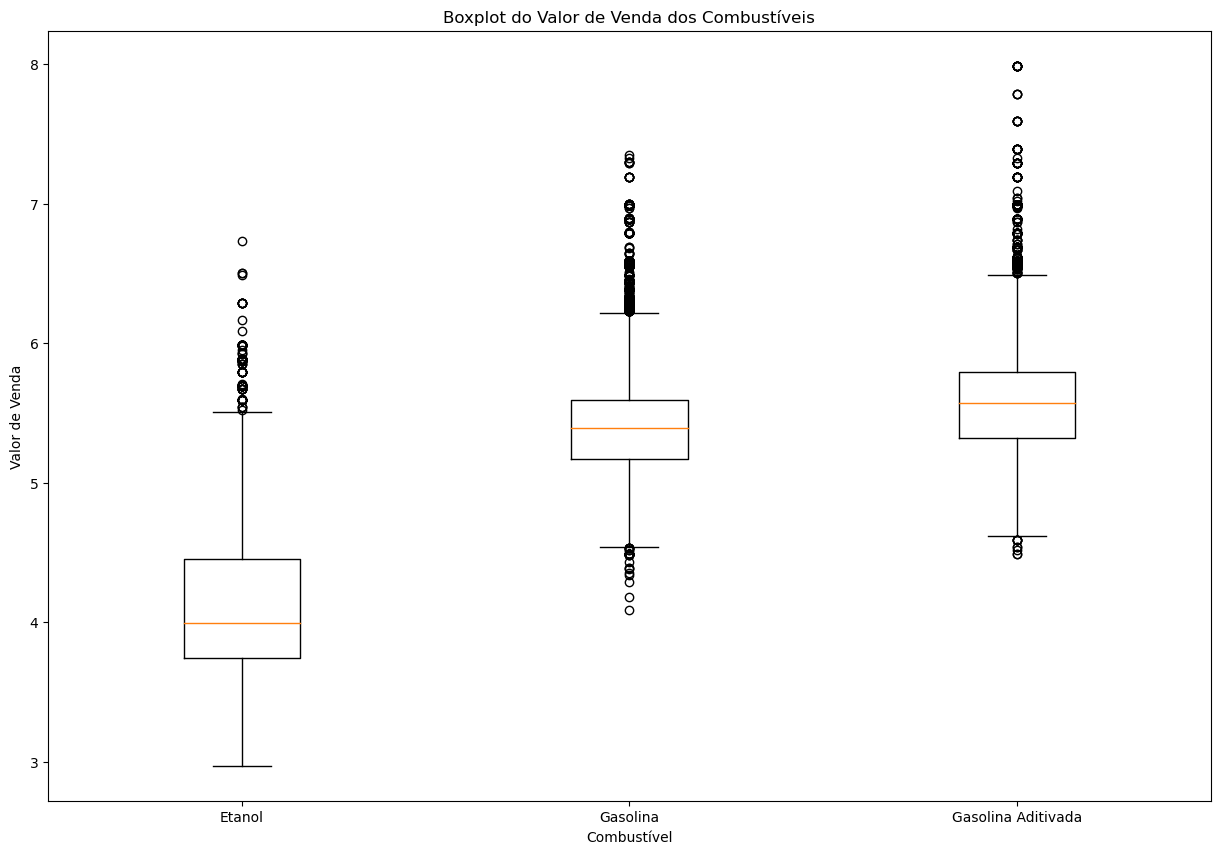

In [31]:
import matplotlib.pyplot as plt

# Dados
dados = [etanol['Valor de Venda'], gasolina['Valor de Venda'], gasolina_aditivada['Valor de Venda']]
nomes_combustiveis = ['Etanol', 'Gasolina', 'Gasolina Aditivada']

# Tamanho da figura
plt.figure(figsize=(15, 10))

# Criação do boxplot com outliers
plt.boxplot(dados, vert=True, labels=nomes_combustiveis, showfliers=True)  # vert=False para um boxplot horizontal

# Título e rótulos
plt.title('Boxplot do Valor de Venda dos Combustíveis')
plt.xlabel('Combustível')
plt.ylabel('Valor de Venda')

# Mostrar o gráfico
plt.show()

- Para confirmar, podemos ver que `99% ` dos valores da gasolina estão proximos ao limite superior do outlier

In [32]:
quantile = gasolina['Valor de Venda'].quantile(.99)
dados ={
    'Combustível': 'Gasolina',
    '99%': quantile,
    'limite superior': limite_outlier_superior_gasolina,
}
df_quantile_limite = pd.DataFrame(dados, index=[0])
df_quantile_limite

,Combustível,99%,limite superior
0,Gasolina,6.59,6.22


## **<font color ='gold' size=5>4 Perguntas</font>**

### **1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?**

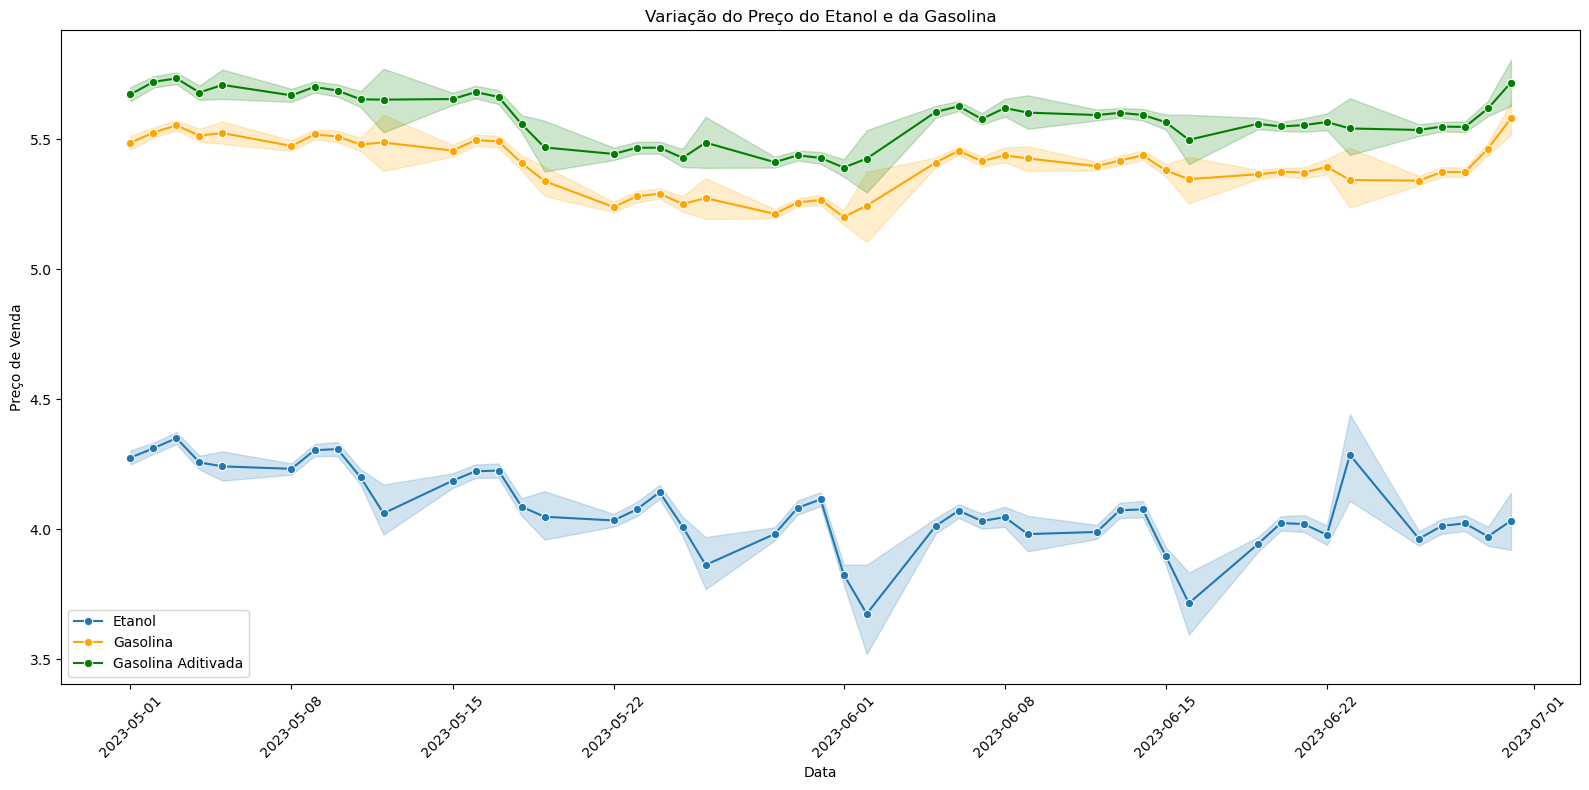

In [33]:
# Usaremos nossas variáveis já criadas "gasolina", "etanol" e "gasolina_aditivada para plotar um gráfico do valores ao longo dos dois meses

plt.figure(figsize=(16,8))
sns.lineplot(data=etanol, x='Data da Coleta', y='Valor de Venda', marker='o', label='Etanol')
sns.lineplot(data=gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Gasolina')
sns.lineplot(data=gasolina_aditivada, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina Aditivada')
plt.xlabel('Data')
plt.ylabel('Preço de Venda')
plt.title('Variação do Preço do Etanol e da Gasolina')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### **2. Qual o preço médio da gasolina e do etanol nesses dois meses?**


In [34]:
# Preço medio da gasolina no mes de Maio

gasolina_maio = gasolina[gasolina['Data da Coleta'].dt.month == 5]['Valor de Venda'].mean() 

# Preço medio da gasolina no mes de Junho

gasolina_junho = gasolina[gasolina['Data da Coleta'].dt.month == 6]['Valor de Venda'].mean()

# Preço medio do Etaanol no mes de Maio

etanol_maio = etanol[etanol['Data da Coleta'].dt.month == 5]['Valor de Venda'].mean()


# Preço medio do Etaanol no mes de Junho

etanol_junho = etanol[etanol['Data da Coleta'].dt.month == 6]['Valor de Venda'].mean()

# Preço medio da gasolina aditivada no mes de Maio

gasolina_aditivada_maio = gasolina_aditivada[gasolina_aditivada['Data da Coleta'].dt.month == 5]['Valor de Venda'].mean()

# Preço medio da gasolina aditivada no mes de Junho

gasolina_aditivada_junho = gasolina_aditivada[gasolina_aditivada['Data da Coleta'].dt.month == 6]['Valor de Venda'].mean()

In [35]:
data = {
    'Combustível': ['Gasolina', 'Etanol', 'Gasolina Aditivada'],
    'Maio': [gasolina_maio, etanol_maio, gasolina_aditivada_maio],
    'Junho': [gasolina_junho, etanol_junho, gasolina_aditivada_junho]
}

df_precos_medios = pd.DataFrame(data)
df_precos_medios.round(2)

,Combustível,Maio,Junho
0,Gasolina,5.40,5.39
1,Etanol,4.18,4.01
2,Gasolina Aditivada,5.59,5.57


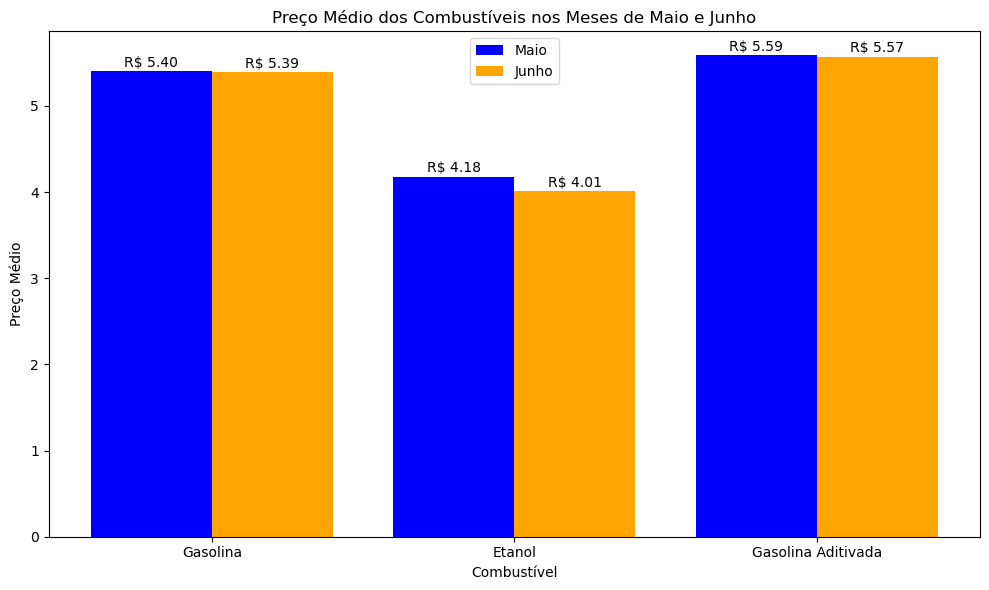

In [36]:
import matplotlib.pyplot as plt

# Dados
combustiveis = ['Gasolina', 'Etanol', 'Gasolina Aditivada']
precos_maio = [gasolina_maio, etanol_maio, gasolina_aditivada_maio]
precos_junho = [gasolina_junho, etanol_junho, gasolina_aditivada_junho]

# Configurar os valores das barras
bar_width = 0.4
r1 = range(len(combustiveis))
r2 = [x + bar_width for x in r1]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(r1, precos_maio, width=bar_width, label='Maio', color='blue')
plt.bar(r2, precos_junho, width=bar_width, label='Junho', color='orange')

# Adicionar rótulos e título
plt.xlabel('Combustível')
plt.ylabel('Preço Médio')
plt.title('Preço Médio dos Combustíveis nos Meses de Maio e Junho')
plt.xticks([r + bar_width/2 for r in range(len(combustiveis))], combustiveis)
plt.legend()

# Adicionar valores acima das barras
for i, v in enumerate(precos_maio):
    plt.text(i, v + 0.05, f'R$ {v:.2f}', ha='center', color='black')

for i, v in enumerate(precos_junho):
    plt.text(i + bar_width, v + 0.05, f'R$ {v:.2f}', ha='center', color='black')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### **3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?**

- Vamos levar em consideração os 2 meses que estamos analisando 

In [37]:
import pandas as pd

# Calcular os preços médios por estado para gasolina, etanol e gasolina aditivada
gasolina_estados = gasolina.groupby('Estado - Sigla')['Valor de Venda'].mean()
etanol_estados = etanol.groupby('Estado - Sigla')['Valor de Venda'].mean()
gasolina_aditivada_estados = gasolina_aditivada.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Criar um DataFrame com os preços médios por estado
df_precos_medios = pd.DataFrame({
    'Gasolina': gasolina_estados,
    'Etanol': etanol_estados,
    'Aditivada': gasolina_aditivada_estados
})

# Ordenar o DataFrame em ordem decrescente com base nos preços médios de gasolina
df_precos_medios = df_precos_medios.sort_values(by='Gasolina', ascending=False)

# Selecionar os 5 primeiros estados
top5_estados = df_precos_medios
# Imprimir o DataFrame com os preços médios dos 5 estados mais caros
top5_estados.head().round(2)



,Gasolina,Etanol,Aditivada
Estado - Sigla,,,
AM,6.36,4.60,6.34
AC,6.12,4.78,6.15
RO,5.90,4.95,5.97
RR,5.86,5.05,5.93
AL,5.67,4.53,5.81


## teste

In [38]:
# Filtrar os dados apenas para 'GASOLINA' e 'GASOLINA ADITIVADA'
df_gasolina = combustiveis[combustiveis['Produto'] == 'GASOLINA'].sample(20000)
df_gasolina_aditivada = combustiveis[combustiveis['Produto'] == 'ETANOL'].sample(20000)

# Plotar o scatter plot com linha de tendência
plt.figure(figsize=(8, 6))
sns.regplot(x='Valor de Venda', y='Valor de Venda', data=df_gasolina, scatter_kws={'s': 10}, label='Gasolina')
sns.regplot(x='Valor de Venda', y='Valor de Venda', data=df_gasolina_aditivada, scatter_kws={'s': 10}, label='Gasolina Aditivada')
plt.title('Correlação entre Gasolina e Gasolina Aditivada')
plt.xlabel('Valor de Venda - Gasolina')
plt.ylabel('Valor de Venda - Gasolina Aditivada')
plt.legend()
plt.grid(True)
plt.show()

# Calcular a correlação
correlation = df_gasolina['Valor de Venda'].corr(df_gasolina_aditivada['Valor de Venda'])
print("Coeficiente de Correlação:", correlation)




TypeError: list indices must be integers or slices, not str

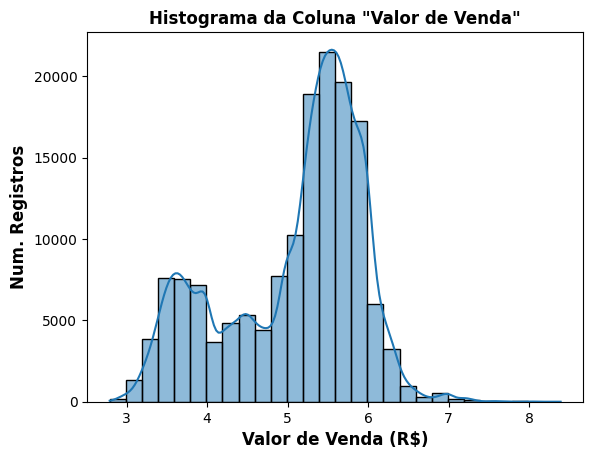

In [ ]:
sns.histplot(data=combustiveis['Valor de Venda'], kde=True, binwidth=0.2)

plt.title('Histograma da Coluna "Valor de Venda"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
import pandas as pd

# Suponhamos que 'gasolina' e 'etanol' são suas séries de dados com quantidades de linhas diferentes
# Vamos criar um DataFrame com as datas como índice
data_index = pd.date_range(start='2023-05-01', end='2023-06-30', freq='D')
df = pd.DataFrame(index=data_index)

# Adicione as colunas 'Valor de Venda da Gasolina' e 'Valor de Venda do Etanol'
df['Valor de Venda da Gasolina'] = gasolina['Valor de Venda']
df['Valor de Venda do Etanol'] = etanol['Valor de Venda']

# Calcule a correlação entre as duas colunas
correlation = df.corr()

# Exiba a matriz de correlação
correlation


,Valor de Venda da Gasolina,Valor de Venda do Etanol
Valor de Venda da Gasolina,NaN,NaN
Valor de Venda do Etanol,NaN,NaN
